<center><h1>Data Wrangling Project</h></center>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#gather">Gathering Data</a></li>
        <li><a href="#assess">Assessing Data</a></li>
            <ol>
                 <li><a href="#enhanced">Enahnced tweets dataframe</a></li>
                <li><a href="#rawtweets">Raw tweets dataframe</a></li>
                <li><a href="#dogpreds">Dog Predictions dataframe</a></li>
            </ol>
        <li><a href="#clean">Cleaning Data</a></li>
         <ol>
                 <li><a href="#enhanced_clean">Enahnced tweets dataframe</a></li>
                <li><a href="#dogpreds_clean">Dog Predictions dataframe</a></li>
            </ol>
        <li><a href="#store">Storing Data</a></li>
        <li><a href="#analyze">Analyzing & Visualizing Data</a></li>
    </ol>
</div>
<br>
<hr>

In [3]:
import numpy as np
import pandas as pd
import requests
import re
import json
import matplotlib.pyplot as plt
print("imported needed libraries")

imported needed libraries


<a id='gather'></a>
## <u>Gathering Data</u>

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# collecting data from json file txt
tweets_raw_data = [] # initiating empty list to store the data

# reading the file
with open("tweet-json.txt") as file: 
    for line in file: 
        words = json.loads(line)
        tweet_id = words["id"]
        likes_counter =  words["favorite_count"]
        retweet_counter = words["retweet_count"]
        # storing the extracted values in a list
        tweets_raw_data.append([tweet_id,likes_counter,retweet_counter])

In [6]:
# reading json extracted data as a dataframe
df_tweets = pd.DataFrame(tweets_raw_data, columns=["tweet_id","likes_counter","retweet_counter"])

In [7]:
# reading the file provided by udacity
df_tweets_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [8]:
# Downloading file programmatically
image_predictions_url = r"https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# getting file
get_file = requests.get(image_predictions_url, stream=True)
# writing it locally
with open("image-predictions.tsv", 'wb') as down_file:
    down_file.write(get_file.content)

In [9]:
# reading the dog predictions from the downloaded file
df_dog_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

<a id='assess'></a>
<u><h2>Assessing Data</h2></u>

In [10]:
df_tweets_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
# showing dataframe information
df_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# showing a sample
df_tweets_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None


In [13]:
# checking duplicates in tweet id
df_tweets_enhanced.tweet_id[df_tweets_enhanced.tweet_id.duplicated()].count()

0

In [14]:
df_tweets_enhanced.tweet_id[df_tweets_enhanced.text.duplicated()].count()

0

In [15]:
# checking max and min, to avoid negative values
print("rating_numerator min, max: ",df_tweets_enhanced.rating_numerator.min(),df_tweets_enhanced.rating_numerator.max())
print("rating_denominator min, max: ",df_tweets_enhanced.rating_denominator.min(),df_tweets_enhanced.rating_denominator.max())

rating_numerator min, max:  0 1776
rating_denominator min, max:  0 170


In [16]:
# values frequency
df_tweets_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# values frequency
df_tweets_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# checking values that do not equal to 10 in denominator 
(df_tweets_enhanced.rating_denominator != 10).sum()

23

In [27]:
###### checking the numerator wrong value
# tweet id 786709082849828864 for testing later
print("Tweet: ",df_tweets_enhanced[df_tweets_enhanced.rating_numerator==75].values[0][5])
print("Numerator: ",df_tweets_enhanced[df_tweets_enhanced.rating_numerator==75].values[0][10])

Tweet:  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
Numerator:  75


In [28]:
# checking names columns
df_tweets_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Bauer         1
Jordy         1
Amber         1
Striker       1
Heinrich      1
Name: name, Length: 957, dtype: int64

In [29]:
def check_name(name):
    """This function checks if the name is less than two letters or if it does not start with a capital letter"""
    if len(name)<2 or re.match("^[^A-Z]",name): 
            return name

In [30]:
# creating a list of invalid names to be replaced later in cleaning stage
lst_invalid_names = list(df_tweets_enhanced.name.apply(lambda x: check_name(x)).unique())

In [31]:
# adding none to the list
lst_invalid_names.append("None")

In [32]:
# counting the entries that are not in the invalid list, so they are a valid entries
df_tweets_enhanced.name.apply(lambda x: x in lst_invalid_names).sum()

855

In [33]:
# checking doggo column entries
df_tweets_enhanced.groupby(["doggo"])["tweet_id"].count()

doggo
None     2259
doggo      97
Name: tweet_id, dtype: int64

In [34]:
# checking floofer column entries
df_tweets_enhanced.groupby(["floofer"])["tweet_id"].count()

floofer
None       2346
floofer      10
Name: tweet_id, dtype: int64

In [35]:
# checking pupper column entries
df_tweets_enhanced.groupby(["pupper"])["tweet_id"].count()

pupper
None      2099
pupper     257
Name: tweet_id, dtype: int64

In [36]:
# checking puppo column entries
df_tweets_enhanced.groupby(["puppo"])["tweet_id"].count()

puppo
None     2326
puppo      30
Name: tweet_id, dtype: int64

<a id="enhanced"></a>
## Enhanced tweets dataset:
### Quality issues:
- Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Wrong data types for timestamp column, retweeted_status_timestamp column
- In rating_denomerator column is int type we will change it into float.
- In rating_numerator column is int type we will change it into float.
- In name column we have a lot 'None' instead of NaN, we have distorted names 2 letters or less, which is not logical in some cases.
- In the last four columns [doggo, floofer, pupper, puppo] we have a lot of None values.
- Replacing all None values in the data with the proper data type
- The source column is one row and repeated in the dataset    
- Some numerator values were not extracted correctly.

### Tidiness issues:
- The last four columns [doggo, floofer, pupper, puppo] should be merged into one column.

In [37]:
# showing tweets dataframe
df_tweets

,tweet_id,likes_counter,retweet_counter
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [38]:
# showing dataframe information
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
likes_counter      2354 non-null int64
retweet_counter    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [39]:
# checking duplicates
df_tweets[df_tweets.tweet_id.duplicated()]

,tweet_id,likes_counter,retweet_counter


In [40]:
# checking min and max to avoin negative numbers
print("likes min, max: ", df_tweets.likes_counter.min(), df_tweets.likes_counter.max())
print("retweet min, max: ",df_tweets.retweet_counter.min(), df_tweets.retweet_counter.max())

likes min, max:  0 132810
retweet min, max:  0 79515


<a id="rawtweets"></a>
## tweets dataset:
### Quality issues:
- None

### Tidiness issues:
- None

In [41]:
# shwoing dataframe
df_dog_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [42]:
# showing dataframe information
df_dog_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
# showing information of numeric values of prediction
df_dog_predictions[["p1_conf","p2_conf","p3_conf"]].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


<a id="dogpreds"></a>
## Dog predictions dataset:

### Quality issues:
- invalid data in column p1 column for dog predictions, as we have fruits and devices names instead of dog breeds names.
- exclude non-recognized dogs
- p1 column name should be renamed.
- p2 & p2_conf, p3 & p3_conf are not necessary as their confidence is low in comparison with p1 & p1_conf column.
- img number columns has no relation to our use case

### Tidness issues:
- the three datasets should be merged into one dataset to ease analysis

<a id='clean'></a>
<u><h2>Cleaning Data</h2></u>

In [44]:
df_tweets_enhanced_cleaned = df_tweets_enhanced.copy()
df_tweets_cleaned = df_tweets.copy()
df_dog_predictions_cleaned = df_dog_predictions.copy()

<a id="enhanced_clean"></a>
###  Enhanced tweets table:
| S | Issue type | Issue                                                                                                                                                           | Fix                                                     |
|:---:|:------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------------------------------:|
| 1 | Tidiness    | Include All original tweets only | remove all tweets that do have retweet id |
| 2 | Quality    | Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp | As they are unnecessary columns, they should be removed |
| 3 | Quality    | Wrong data types for timestamp column                                                                                       | change the data type of time stamp |
| 4 | Quality    | In rating_denomerator column has wrong data type which is int                                                                                                  | convert it into float                                  |
| 5 | Quality    | In rating_numerator column  has wrong data type which is int                                                           | convert it into float                                     |
| 6 | Quality    | In name column we have a lot 'None' instead of NaN, we have distorted names 2 letters or less, which is not logical in some cases.                              | Remove none and distorted names                         |
| 7 | Quality    | replacing all None values to the proper data type                                                                          |  replace none with NaN                                  |
| 8 | Tidiness   | The last four columns [doggo, floofer, pupper, puppo] should be merged into one column                                                                        | adding them into one column                     |
| 9 | Quality   | The source column is one row and repeated in the dataset                                                                        | delete it                  |
| 10 | Quality   | Some rating_numerator values are not matching the values in the tweet                                                                        | Extract them correctly                 |

In [45]:
# 1.
# Define
# Exclude non-original tweets

# Code

df_tweets_enhanced_cleaned = df_tweets_enhanced_cleaned[df_tweets_enhanced_cleaned.retweeted_status_user_id.isnull()] 

# Test
df_tweets_enhanced_cleaned.retweeted_status_user_id[df_tweets_enhanced_cleaned.retweeted_status_user_id.isnull()==False].count()

0

In [46]:
# 2.
# Define
# Drop columns using drop method

# Code
df_tweets_enhanced_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

# Test
df_tweets_enhanced_cleaned.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1479,693582294167244802,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Personally I'd give him an 11/10. Not sure why...,NaN,11,10,None,None,None,None,None
936,753375668877008896,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [47]:
# 3.
# Define
# Change the datatype of time stamp using pandas to_datetime method

# Code
df_tweets_enhanced_cleaned.timestamp = pd.to_datetime(df_tweets_enhanced_cleaned.timestamp)

# Test
print(df_tweets_enhanced_cleaned.timestamp.dtype)

datetime64[ns, UTC]


In [48]:
# 4.
# Define
# Change rating_denomerator column to float data type

# Code 
df_tweets_enhanced_cleaned.rating_denominator = df_tweets_enhanced_cleaned.rating_denominator.astype('float')

# Test
df_tweets_enhanced_cleaned[["rating_denominator"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
rating_denominator    2175 non-null float64
dtypes: float64(1)
memory usage: 34.0 KB


In [49]:
# 5.
# Define
# Change rating_numerator column to float data type

# Code 
df_tweets_enhanced_cleaned.rating_numerator = df_tweets_enhanced_cleaned.rating_numerator.astype('float')

# Test
df_tweets_enhanced_cleaned[["rating_numerator"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
rating_numerator    2175 non-null float64
dtypes: float64(1)
memory usage: 34.0 KB


In [50]:
# 6.
# Define
# Replace none and remove distorted names from name column

# Code
repl_dct = {}
for i in lst_invalid_names:
    repl_dct[i] = np.nan


df_tweets_enhanced_cleaned.name.replace(repl_dct, inplace=True)


# Test
df_tweets_enhanced_cleaned[["name"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
name    1390 non-null object
dtypes: object(1)
memory usage: 34.0+ KB


In [51]:
# 7.
# Define
# Merge the last four columns into one column

# Code
## replacing None values with empty string
df_tweets_enhanced_cleaned[["doggo","floofer","pupper","puppo"]] = df_tweets_enhanced_cleaned[["doggo","floofer","pupper","puppo"]].replace("None",'')
## adding all the columns string together and storing them in one column
df_tweets_enhanced_cleaned["dog_stage"] = df_tweets_enhanced_cleaned["doggo"] +  df_tweets_enhanced_cleaned["floofer"] +  df_tweets_enhanced_cleaned["pupper"] +  df_tweets_enhanced_cleaned["puppo"]
## dropping the four columns after we stored them in one column
df_tweets_enhanced_cleaned.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

# Test
df_tweets_enhanced_cleaned[df_tweets_enhanced_cleaned["dog_stage"]!='']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo
...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9.0,10.0,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12.0,10.0,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11.0,10.0,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9.0,10.0,Opal,pupper


In [52]:
# we found that multiple stages are given we will change them to multiple
df_tweets_enhanced_cleaned.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [53]:
# 7.1
# Define 
# Replace multiple stages with "multiple"

# Code
## saving the replacements in a dictionary
dog_stage_repl = {"doggopuppo":"multiple","doggofloofer":"multiple","doggopupper":"multiple"}
## replacing the values
df_tweets_enhanced_cleaned["dog_stage"].replace(dog_stage_repl, inplace=True)

# Test
df_tweets_enhanced_cleaned.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'],
      dtype=object)

In [54]:
# 8.
# Define
# Replace none & "" in all dataset.

# Code
df_tweets_enhanced_cleaned.replace("None",np.nan,inplace=True)
df_tweets_enhanced_cleaned.replace("",np.nan,inplace=True)
# Test
df_tweets_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1390 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 169.9+ KB


In [55]:
# 9.
# Define
# Delete source column as it doesnt add anything to our data and its one row and repeated in all our dataset.

# Code
df_tweets_enhanced_cleaned.drop(["source"], axis=1, inplace=True)

# Test
df_tweets_enhanced_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1390 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 152.9+ KB


In [56]:
# 10.
# Define
# Extract the values from text column to get the right numerator correctly

# Code
rating = df_tweets_enhanced_cleaned.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_tweets_enhanced_cleaned.rating_numerator = rating.rating_numerator

# Test
## the tweet id of the wrong value we found in assessment
df_tweets_enhanced_cleaned[df_tweets_enhanced_cleaned.tweet_id == 786709082849828864]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN


<a id="dogpreds_clean"></a>
## Dog predictions table:
| S | Issue Type | Issue                                                                                                                       | Fix                                                    |
|---|------------|-----------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------|
| 1 | Quality    | invalid data in column p1 column for dog predictions, as we have fruits and devices names instead of dog breeds names.      | We cannot delete it entirly but can try a better model |
| 2 | Quality   | p2 &amp; p2_conf, p3 &amp; p3_conf are not necessary as their confidence is low in comparison with p1 &amp; p1_conf column. | Should be deleted                                      |
|  | Quality   |  img number column has no use in our use case for this data                                                                                             |Should be deleted |
| 3 | Quality   | P1 &amp; P1_dog column name is not descriptive                                 | Should be renamed    
| 4 | Quality| is it dog column shows if the pciture is for a true dog or not                                | Should remove all predictions which are not dogs then delete the column
| 5 | Tidiness   |  The three tables are separate                                                                                               | Join the three tables into one table                   |


In [57]:
# 1.
# Define
# Use a better model for recoginition with higher accuracy, for now we will stick with what we have

In [58]:
# 2.
# Define
# Delete additional column p2 & p2_conf, p3 & p3_conf & img_num

# Code
df_dog_predictions_cleaned.drop(['p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','img_num'], axis=1, inplace=True)

# Test
df_dog_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 67.0+ KB


In [59]:
# 3.
# Define
# Rename non-descriptive columns P1 & P1_conf, P1_dog

# Code
df_dog_predictions_cleaned.rename(columns={'p1': 'dog_prediction','p1_conf':'prediction_accuracy' ,'p1_dog':"is_it_dog"},inplace=True)

# Test
df_dog_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id               2075 non-null int64
jpg_url                2075 non-null object
dog_prediction         2075 non-null object
prediction_accuracy    2075 non-null float64
is_it_dog              2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 67.0+ KB


In [60]:
# 4.
# Define
# Exclude all tweets that do not have right predictions then delete the column

# Code
df_dog_predictions_cleaned = df_dog_predictions_cleaned.loc[df_dog_predictions_cleaned.is_it_dog==True]
df_dog_predictions_cleaned.drop("is_it_dog",axis=1,inplace=True)


# Test
df_dog_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id               1532 non-null int64
jpg_url                1532 non-null object
dog_prediction         1532 non-null object
prediction_accuracy    1532 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 59.8+ KB


In [61]:
# 5.
# Define
# Joining the three tables into one table

# Code
df_temp = pd.merge(df_tweets_enhanced_cleaned,df_dog_predictions_cleaned, left_on='tweet_id', right_on='tweet_id')


# Test
df_temp

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_prediction,prediction_accuracy
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
1473,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
1474,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
1475,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


In [62]:
# Test 2
pd.merge(df_temp,df_tweets_cleaned, on='tweet_id')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_prediction,prediction_accuracy,likes_counter,retweet_counter
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,41048,9774
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,20562,3261
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,12041,2158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,111,41
1473,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,311,147
1474,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,128,47
1475,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,132,48


In [63]:
# We store our comprehensive dataset
df_twitter_archive_master = pd.merge(df_temp,df_tweets_cleaned, on='tweet_id')

<a id='store'></a>
## <u>Storing Data</u>

In [64]:
# saving the master file
df_twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

<a id='analyze'></a>
## <u>Analyzing & Visualizing Data</u>

In [65]:
# reading data from the file we saved
df = pd.read_csv("twitter_archive_master.csv", index_col=0)

In [66]:
# converting timstamp column to the proper data type
df.timestamp = pd.to_datetime(df.timestamp)

In [67]:
# setting the timestamp as the index in order to make the index meaningful
df.set_index("timestamp", inplace=True)

In [68]:
# showing basic statistics of the numerical columns
df.describe()

,rating_numerator,rating_denominator,prediction_accuracy,likes_counter,retweet_counter
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,11.506283,10.534868,0.614364,9288.481381,2790.399458
std,7.690285,6.849696,0.260342,12593.129577,4763.557005
min,1.000000,2.000000,0.044333,81.000000,16.000000
25%,10.000000,10.000000,0.392108,2232.000000,656.000000
50%,11.000000,10.000000,0.615741,4503.000000,1443.000000
75%,12.000000,10.000000,0.853170,11746.000000,3261.000000
max,165.000000,150.000000,0.999956,132810.000000,79515.000000


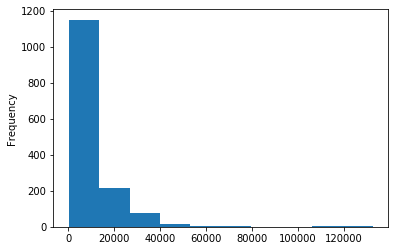

In [69]:
# showing the likes distribution
df.likes_counter.plot(kind="hist")

We can see that most likes ranges between 0 and 20000

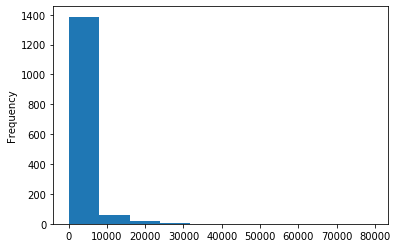

In [70]:
# showing the retweets number distribution
df.retweet_counter.plot(kind="hist")

We can see that most retweets ranges between 0 and 10000

In [86]:
# getting the dog that got the highest likes
most_liked_dog = df[df.likes_counter==df.likes_counter.max()]
print("Page rating: ",str(most_liked_dog.values[0][2]) + "/10")
print("Name: ",most_liked_dog.values[0][4])
print("Dog_stage: ",most_liked_dog.values[0][5])
print("Breed: ",most_liked_dog.values[0][7])
print("Likes: ",most_liked_dog.values[0][9])
print("Retweets: ",most_liked_dog.values[0][10])

Page rating:  13.0/10
Name:  nan
Dog_stage:  puppo
Breed:  Lakeland_terrier
Likes:  132810
Retweets:  48265


The most liked dog was Lakeland_terrier breed with around 132810 likes with no name mentioned.

In [87]:
# getting the dog that got the highest retweets
most_retweeted_dog = df[df.retweet_counter==df.retweet_counter.max()]
print("Page rating: ",str(most_retweeted_dog.values[0][2]) + "/10")
print("Name: ",most_retweeted_dog.values[0][4])
print("Dog_stage: ",most_retweeted_dog.values[0][5])
print("Breed: ",most_retweeted_dog.values[0][7])
print("Likes: ",most_retweeted_dog.values[0][9])
print("Retweets: ",most_retweeted_dog.values[0][10])

Page rating:  13.0/10
Name:  nan
Dog_stage:  doggo
Breed:  Labrador_retriever
Likes:  131075
Retweets:  79515


The most retweeted dog was Labrador_retriever breed with around 79515 retweets and also the name is missing.

(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

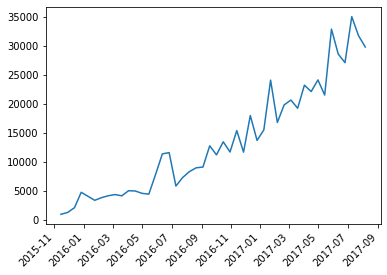

In [88]:
# showing the average likes rate of every two weeks over time
plt.plot(df.likes_counter.resample("2W").mean())
plt.xticks(rotation=45, ha='right')

We resampled our data for each two weeks and we measured the average of likes, we find that the number of likes is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

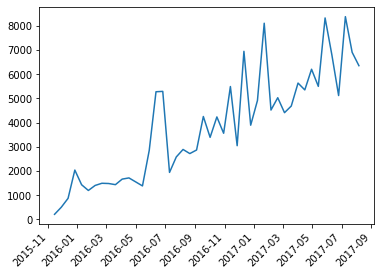

In [89]:
# showing the average retweet rate of every two weeks over time
plt.plot(df.retweet_counter.resample("2w").mean())
plt.xticks(rotation=45, ha='right')

We also resampled our data for each two weeks and we measured the average of retweet rate. We find that the number of retweets is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

Text(0.5, 1.0, 'Top 10 most common dog breeds')

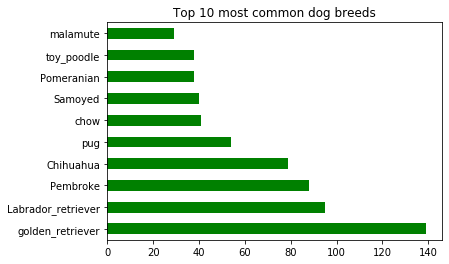

In [90]:
# showing the most common breeds in dogs
df["dog_prediction"].value_counts()[:10].plot(kind="barh", color='g')
plt.title("Top 10 most common dog breeds")

We also investigated the top 10 common breeds in dogs and we can notice that the most common breed is “Golden retriever” and the lowest is “Malamute”.

In [91]:
# showing the highest rated dog
highest_dog_page_rate= df[df["rating_numerator"]==df["rating_numerator"].max()]
print("Page rating: ",str(highest_dog_page_rate.values[0][2]) + "/10")
print("Name: ",highest_dog_page_rate.values[0][4])
print("Dog_stage: ",highest_dog_page_rate.values[0][5])
print("Breed: ",highest_dog_page_rate.values[0][7])
print("Likes: ",highest_dog_page_rate.values[0][9])
print("Retweets: ",highest_dog_page_rate.values[0][10])

Page rating:  165.0/10
Name:  nan
Dog_stage:  nan
Breed:  Labrador_retriever
Likes:  5316
Retweets:  2539


We also investigate the highly rated dogs by the page using numerator as they have the same denominator, so we can use the numerator only, we can see that “Pomeranian” dog breed is the highest and the dog name is Logan.

## Conclusion:
### Having looked at these insights, it may gives you an idea if you like dogs or recommendation about the most liked dogs. In addition, it may help you to know what are the common dogs in the market and it may be a simple advice, if you are looking for a dog to buy and want your dog to be cute.